# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [236]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import weather_api_key
api_key = weather_api_key

# Incorporate citipy to choose vitiees based on longitude and latitude corridinates
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/WeatherPy_df.csv"

# Range of longitude and latitude
lat_range = (-90, 90)
lng_range = (-180, 180)

#base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Iteration count
count_one = 0
set_one = 1

## Generate Cities List

In [237]:
city_two_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lngs_list = []
lats_list = []
max_temp_list = []
wind_speed_list = []
count_one = 0
set_one = 1

In [238]:
units = "imperial"
# qery url
query_url = f"{base_url}appid={api_key}&units={units}&q="

# Empty list to be used to hold latitude, longitudem and cities
lat_lngs = []
cities = []

# Create a raandomly generated set of longitude and latitude pairs
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each longitude-latitdue pair
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is not found add it to our list of cities
    if city not in cities:
        cities.append(city)
        
# Print city count to insure adequate amount
len(cities)
        

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [239]:
# Initial count amount
count_one = 0
set_one = 1

print("Beginning Data Retrieval")
print("----------------------------")

for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        #city_name_list.append(response["name"])
        cloud_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two_list.append(city)
            
        else:
            count_one += 1
            city_two_list.append(city)
            
        print(f"Processing Record {count_one} of Set {set_one} : {city}")

    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("--------------------------------------")
print("Data Retrieval Complete")
print("---------------------------------------")


Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 : poum
Processing Record 2 of Set 1 : qaanaaq
Processing Record 3 of Set 1 : grand river south east
Processing Record 4 of Set 1 : pinyug
Processing Record 5 of Set 1 : atuona
Processing Record 6 of Set 1 : port elizabeth
Processing Record 7 of Set 1 : puerto padre
Processing Record 8 of Set 1 : hobart
Processing Record 9 of Set 1 : rikitea
Processing Record 10 of Set 1 : chuy
Processing Record 11 of Set 1 : kaitangata
Processing Record 12 of Set 1 : kruisfontein
Processing Record 13 of Set 1 : otofuke
Processing Record 14 of Set 1 : busselton
Processing Record 15 of Set 1 : hermanus
Processing Record 16 of Set 1 : saint-philippe
Processing Record 17 of Set 1 : mount gambier
City not found. Skipping...
Processing Record 18 of Set 1 : thompson
Processing Record 19 of Set 1 : rocha
Processing Record 20 of Set 1 : ushuaia
Processing Record 21 of Set 1 : coruripe
Processing Record 22 of Set 1 : cayenne
Proce

City not found. Skipping...
Processing Record 37 of Set 4 : lucapa
Processing Record 38 of Set 4 : north bend
City not found. Skipping...
Processing Record 39 of Set 4 : dafeng
City not found. Skipping...
Processing Record 40 of Set 4 : kahului
Processing Record 41 of Set 4 : bethel
Processing Record 42 of Set 4 : turukhansk
Processing Record 43 of Set 4 : lagoa
Processing Record 44 of Set 4 : cairns
Processing Record 45 of Set 4 : aguimes
Processing Record 46 of Set 4 : thinadhoo
Processing Record 47 of Set 4 : college
Processing Record 48 of Set 4 : denpasar
Processing Record 49 of Set 4 : dzerzhinsk
Processing Record 1 of Set 5 : vanimo
Processing Record 2 of Set 5 : kampot
Processing Record 3 of Set 5 : sur
Processing Record 4 of Set 5 : chokurdakh
Processing Record 5 of Set 5 : gigmoto
Processing Record 6 of Set 5 : syracuse
Processing Record 7 of Set 5 : san rafael
Processing Record 8 of Set 5 : tezu
Processing Record 9 of Set 5 : clarksburg
Processing Record 10 of Set 5 : nosy v

Processing Record 28 of Set 8 : bowen
Processing Record 29 of Set 8 : rolla
Processing Record 30 of Set 8 : odweyne
Processing Record 31 of Set 8 : lata
Processing Record 32 of Set 8 : ridgecrest
Processing Record 33 of Set 8 : marinette
Processing Record 34 of Set 8 : sompeta
Processing Record 35 of Set 8 : bukachacha
Processing Record 36 of Set 8 : hofn
Processing Record 37 of Set 8 : lima
Processing Record 38 of Set 8 : pochutla
Processing Record 39 of Set 8 : vinh
Processing Record 40 of Set 8 : mugla
Processing Record 41 of Set 8 : shumskiy
Processing Record 42 of Set 8 : luderitz
Processing Record 43 of Set 8 : munster
Processing Record 44 of Set 8 : boone
Processing Record 45 of Set 8 : baykit
City not found. Skipping...
Processing Record 46 of Set 8 : souillac
Processing Record 47 of Set 8 : rawson
Processing Record 48 of Set 8 : adrar
Processing Record 49 of Set 8 : vostok
Processing Record 1 of Set 9 : sao joao da barra
Processing Record 2 of Set 9 : emerald
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [210]:
weather_dict = {
    "City": city_two_list,
    "Latitude": lats_list,
    "Longitude": lngs_list,
    "Max_Temp": max_temp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloud_list,
    "Wind_Speed": wind_speed_list,
    "Country": country_list,
    "Datetime": date_list
    
}

In [211]:
# establish weather DataFrame
weather_df = pd.DataFrame(weather_dict)

In [212]:
weather_df.count()

City          560
Latitude      560
Longitude     560
Max_Temp      560
Humidity      560
Cloudiness    560
Wind_Speed    560
Country       560
Datetime      560
dtype: int64

In [213]:
weather_df

,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Datetime
0,ushuaia,-54.80,-68.30,35.60,80,75,25.28,AR,1603190951
1,pakxe,15.12,105.78,80.60,88,90,6.93,LA,1603191358
2,hermanus,-34.42,19.23,61.00,67,15,5.99,ZA,1603190939
3,aksu,41.12,80.26,66.99,23,0,4.79,CN,1603191333
4,carnarvon,-24.87,113.63,71.60,68,0,19.46,AU,1603191224
...,...,...,...,...,...,...,...,...,...
555,vilhena,-12.74,-60.15,73.36,83,100,1.83,BR,1603191492
556,lata,40.16,-8.33,63.00,94,100,1.99,PT,1603191238
557,kaspiysk,42.88,47.64,62.60,59,45,17.90,RU,1603191387
558,iacu,-12.77,-40.21,79.57,64,100,5.53,BR,1603191493


In [240]:
# Output weather data to csv file
weather_df.to_csv("output_data/WeatherPy_df.csv", index=False)

In [215]:
# check weather_df for any null values
weather_df.count()

City          560
Latitude      560
Longitude     560
Max_Temp      560
Humidity      560
Cloudiness    560
Wind_Speed    560
Country       560
Datetime      560
dtype: int64

In [216]:
# Check to insure there are no duplicate cities
weather_df["City"].nunique()

560

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [217]:
muggy_air = weather_df[weather_df["Humidity"] > 100]
muggy_air.shape

(0, 9)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

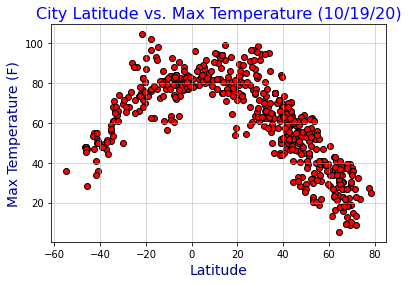

In [218]:
# create latitude vs Temp plot
plt.scatter(weather_df["Latitude"], weather_df["Max_Temp"], edgecolors="black", facecolors="red")
# Give plot a title
plt.title("City Latitude vs. Max Temperature (10/19/20)", fontsize=16, color="blue")
# Label the x-axis
plt.xlabel("Latitude", fontsize=14, color="darkblue")
# Label the y-axis
plt.ylabel("Max Temperature (F)", fontsize=14, color="darkblue")
# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha=0.5)
plt.savefig("Images/City_Latitude vs Max_Tmp.png")

This scatter plot shows (via visualiztion only) that at the time this data was collected, a relationship existed
between the location of a city (latitude), relative to the equator, and the cities temperature. Specificslly, it shows that the closer a city is to the equator (latitude = 0), the hotter the temperaturre is.

------------------------------------------------------------------------------------------------------------------

## Latitude vs. Humidity Plot

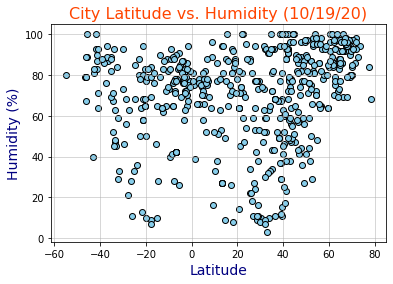

In [219]:
# Create latitude vs. Humidity plot
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], edgecolors="black", facecolors="skyblue")
# Give plot a title
plt.title("City Latitude vs. Humidity (10/19/20)", fontsize=16, color="orangered")
# Label the x-axis
plt.xlabel("Latitude", fontsize=14, color="navy")
# Label the y-axis
plt.ylabel("Humidity (%)", fontsize=14, color="navy")
# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha=0.5)
plt.savefig("Images/City_Latitude vs Humidity.png")

This scatter plot definitely illustrates that the overall humitdity, on the date the this data was collected (10/19/20), tends to be in the high 70's to 100 degreees acroos the globe. This can be seem by the fact the a disproportionate number of cities have a humidity levell towasrds the upper limit of the y-axis (humidity %). This grapgh also seems to suggest that the further north of the equator a city is, the more likely it will have a humidity level in the 80%-100% range.

## Latitude vs. Cloudiness Plot

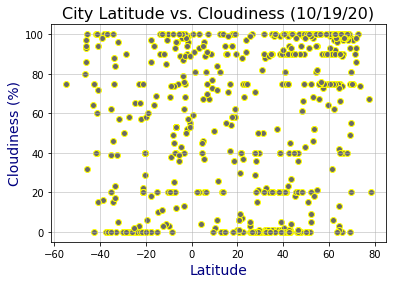

In [220]:
# Create Latitude vs Cloudiness plot
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], edgecolors="yellow", facecolors="dimgrey")
# Give plot a title
plt.title("City Latitude vs. Cloudiness (10/19/20)", fontsize=16, color="black")
# Label the x-axis
plt.xlabel("Latitude", fontsize=14, color="navy")
# Label the y-axis
plt.ylabel("Cloudiness (%)", fontsize=14, color="navy")
# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha=0.5)
plt.savefig("Images/City_Latitude vs Cloudiness.png")

The graphm, examining the cloud coverage of the cities, does not give any evidence, that would suggesst a relatioonship exists between a cities latitude and the amount of cloud coverage it experienced on the day this data wss collected. This observation is based on the seemimngly randomness with whicch the data points are located on this scatter plot.

## Latitude vs. Wind Speed Plot

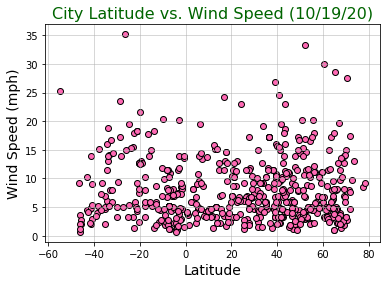

In [221]:
# Create latitude vs wind speed plot
plt.scatter(weather_df["Latitude"], weather_df["Wind_Speed"], edgecolors="black", facecolors="hotpink")
# Give plot a title
plt.title("City Latitude vs. Wind Speed (10/19/20)", fontsize=16, color="darkgreen")
# Label the x-axis
plt.xlabel("Latitude", fontsize=14, color="black")
# Label the y-axis
plt.ylabel("Wind Speed (mph)", fontsize=14, color="black")
# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha=0.5)
plt.savefig("Images/City_Latitude vs Wind_Speed.png")

The only conclusions one can draw frm the graph comparing latitude and wind speed, is that on the 19th of October, there was not strong winds, globally.

---------------------------------------------------------------------------------------------------------------

## Linear Regression

In [222]:
# Generate two SataFrames: one for the Northern Hemisphere (0 to 90 degrees; 
# and one for the Southern Hemisphere (0 to -90 degrees)

north_hemi = weather_df.loc[weather_df["Latitude"]>=0]
south_hemi = weather_df.loc[weather_df["Latitude"]<0]


In [223]:
# Define the function for computing linear regression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values, "r-")
    return line_eq

# Define a function for annotating
def annotate(line_eq, a , b):
    plt.annotate(line_eq,(a,b),fontsize=15, color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.88


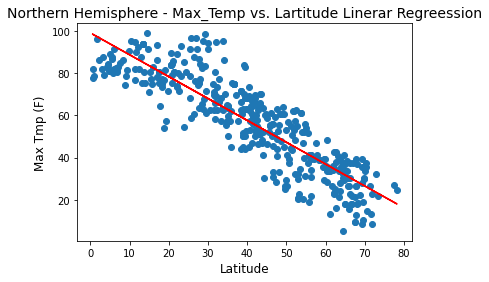

In [224]:
# Call an function #1
equation = linear_agression(north_hemi["Latitude"], north_hemi["Max_Temp"])
# Call an function #2
annotate(equation, 0, 0)
# Set title
plt.title("Northern Hemisphere - Max_Temp vs. Lartitude Linerar Regreession", fontsize=14)
# Title for x-axis
plt.xlabel("Latitude", fontsize=12)
# Title for y-axis
plt.ylabel("Max Tmp (F)", fontsize=12)
# Save the graph
plt.savefig("Images/Nortern Hemisphere - Max Temp vs. Lat Linear Regression.png")

There is a strong negativre correlation between latitude and max temp in Northern Hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.77


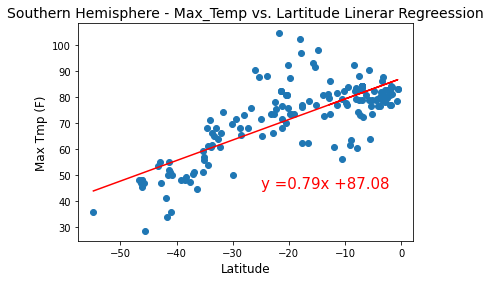

In [225]:
# Call an function #1
equation = linear_agression(south_hemi["Latitude"], south_hemi["Max_Temp"])
# Call an function #2
annotate(equation, -25,45)
# Set title
plt.title("Southern Hemisphere - Max_Temp vs. Lartitude Linerar Regreession", fontsize=14)
# Title for x-axis
plt.xlabel("Latitude", fontsize=12)
# Title for y-axis
plt.ylabel("Max Tmp (F)", fontsize=12)
# Save the graph
plt.savefig("Images/Southern Hemisphere - Max Temp vs. Lat Linear Regression.png")

There is a strong positive correlation between latitude and max temp in Southern Hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.36


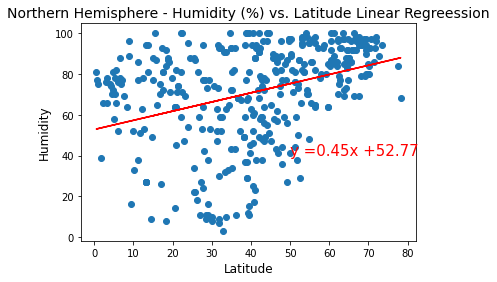

In [226]:
equation = linear_agression(north_hemi["Latitude"], north_hemi["Humidity"])

annotate(equation, 50, 40)

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regreession", fontsize=14)

plt.xlabel("Latitude", fontsize=12)

plt.ylabel("Humidity", fontsize=12)

plt.savefig("Images/North Hemi-Humidity vs. Lat Lin Regression.png")

There is moderate positive correlation betwen latitude and humidity in the Northern Hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.06


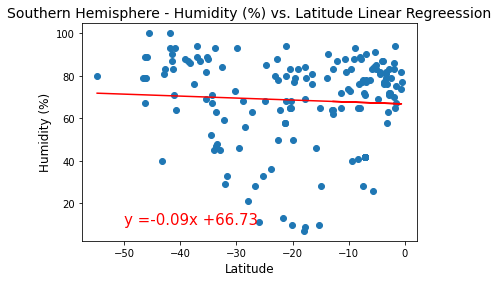

In [227]:
equation = linear_agression(south_hemi["Latitude"], south_hemi["Humidity"])

annotate(equation, -50, 10)

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regreession", fontsize=14)

plt.xlabel("Latitude", fontsize=12)

plt.ylabel("Humidity (%)", fontsize=12)

plt.savefig("Images/South Hemi-Humidity vs. Lat Lin Regression.png")

There a slight negative correlation between latitude and humidity in the Southern Hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.27


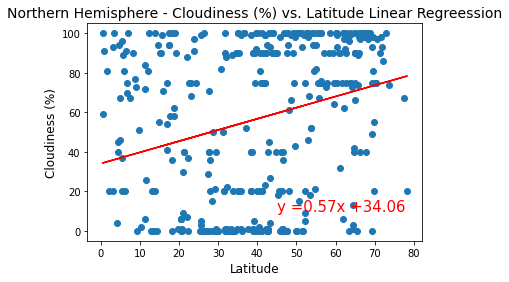

In [228]:
equation = linear_agression(north_hemi["Latitude"], north_hemi["Cloudiness"])

annotate(equation, 45, 10)

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regreession", fontsize=14)

plt.xlabel("Latitude", fontsize=12)

plt.ylabel("Cloudiness (%)", fontsize=12)

plt.savefig("Images/North Hemi-Cloudiness vs. Lat Lin Regression.png")

There is a strong positive correlation between latitude and cloudiness in the Northern Hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.12


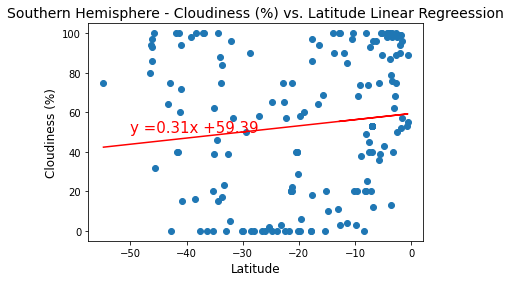

In [229]:
equation = linear_agression(south_hemi["Latitude"], south_hemi["Cloudiness"])

annotate(equation, -50, 50)

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regreession", fontsize=14)

plt.xlabel("Latitude", fontsize=12)

plt.ylabel("Cloudiness (%)", fontsize=12)

plt.savefig("Images/South Hemi-Cloudiness vs. Lat Lin Regression.png")

There is a weak positive correlation between latitude and cloudiness in the Southern Hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.05


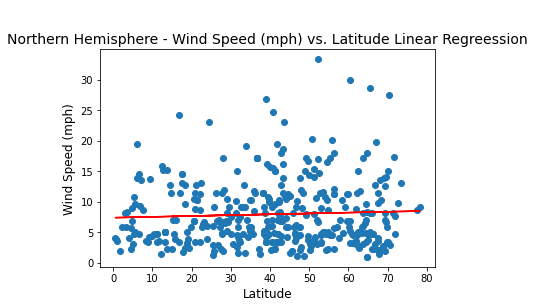

In [230]:
equation = linear_agression(north_hemi["Latitude"], north_hemi["Wind_Speed"])

annotate(equation, 10, 40)

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regreession", fontsize=14)

plt.xlabel("Latitude", fontsize=12)

plt.ylabel("Wind Speed (mph)", fontsize=12)

plt.savefig("Images/North Hemi-Wind Speed vs. Lat Lin Regression.png")

There is a no correlation between latitude and wind speed in the Northern Hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.12


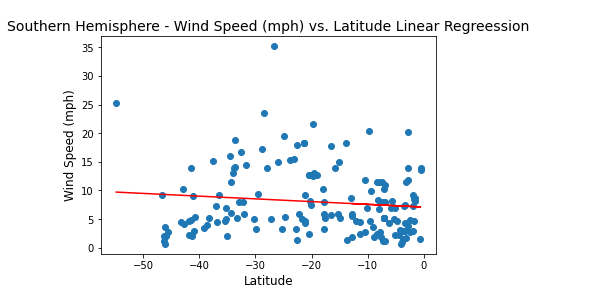

In [231]:
equation = linear_agression(south_hemi["Latitude"], south_hemi["Wind_Speed"])

annotate(equation, 10, 40)

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regreession", fontsize=14)

plt.xlabel("Latitude", fontsize=12)

plt.ylabel("Wind Speed (mph)", fontsize=12)

plt.savefig("Images/South Hemi-Wind Speed vs. Lat Lin Regression.png")

There is correlation betweeen latidude and the wind speed in the Southern Hemisphere